# **AYUSH VERMA**

## HAMOYE ID: 1477941c2441f000

### *MACHINE LEARNING REGRESSION PREDICTING ENERGY EFFICIENCY OF BUILDINGS*


**Dataset:** https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

The dataset for the remainder of this quiz is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

Column Names and Description:

*   Date, time year-month-day hour:minute:second
*   Appliances, energy use in Wh
*   lights, energy use of light fixtures in the house in Wh
*   T1, Temperature in kitchen area, in Celsius
*   RH_1, Humidity in kitchen area, in %
*   T2, Temperature in living room area, in Celsius
*   RH_2, Humidity in living room area, in %
*   T3, Temperature in laundry room area
*   RH_3, Humidity in laundry room area, in %
*   T4, Temperature in office room, in Celsius
*   RH_4, Humidity in office room, in %
*   T5, Temperature in bathroom, in Celsius
*   RH_5, Humidity in bathroom, in %
*   T6, Temperature outside the building (north side), in Celsius
*   RH_6, Humidity outside the building (north side), in %
* T7, Temperature in ironing room , in Celsius
* RH_7, Humidity in ironing room, in %
* T8, Temperature in teenager room 2, in Celsius
* RH_8, Humidity in teenager room 2, in %
* T9, Temperature in parents room, in Celsius
* RH_9, Humidity in parents room, in %
* To, Temperature outside (from Chievres weather station), in Celsius
* Pressure (from Chievres weather station), in mm Hg
* RH_out, Humidity outside (from Chievres weather station), in %
* Wind speed (from Chievres weather station), in m/s
* Visibility (from Chievres weather station), in km
* Tdewpoint (from Chievres weather station), Â°C
* rv1, Random variable 1, nondimensional
* rv2, Random variable 2, nondimensional
















In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [85]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

###**Observations**
1. There is no missing data and not much cleaning is required
2. There are 29 columns
3. There are 19735 rows
4. Except for the date column, all the other data is numeric

In [87]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

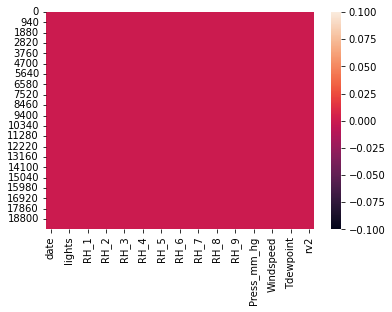

In [88]:
sns.heatmap(df.isnull())

In [89]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


T_out varies a lot ranging from -5 to 26 degree Celsius

In [90]:
for i in df:
  a=df[i].unique()
  if len(a)<20:
    print(i,a)

lights [30 40 50 70 60 10 20  0]


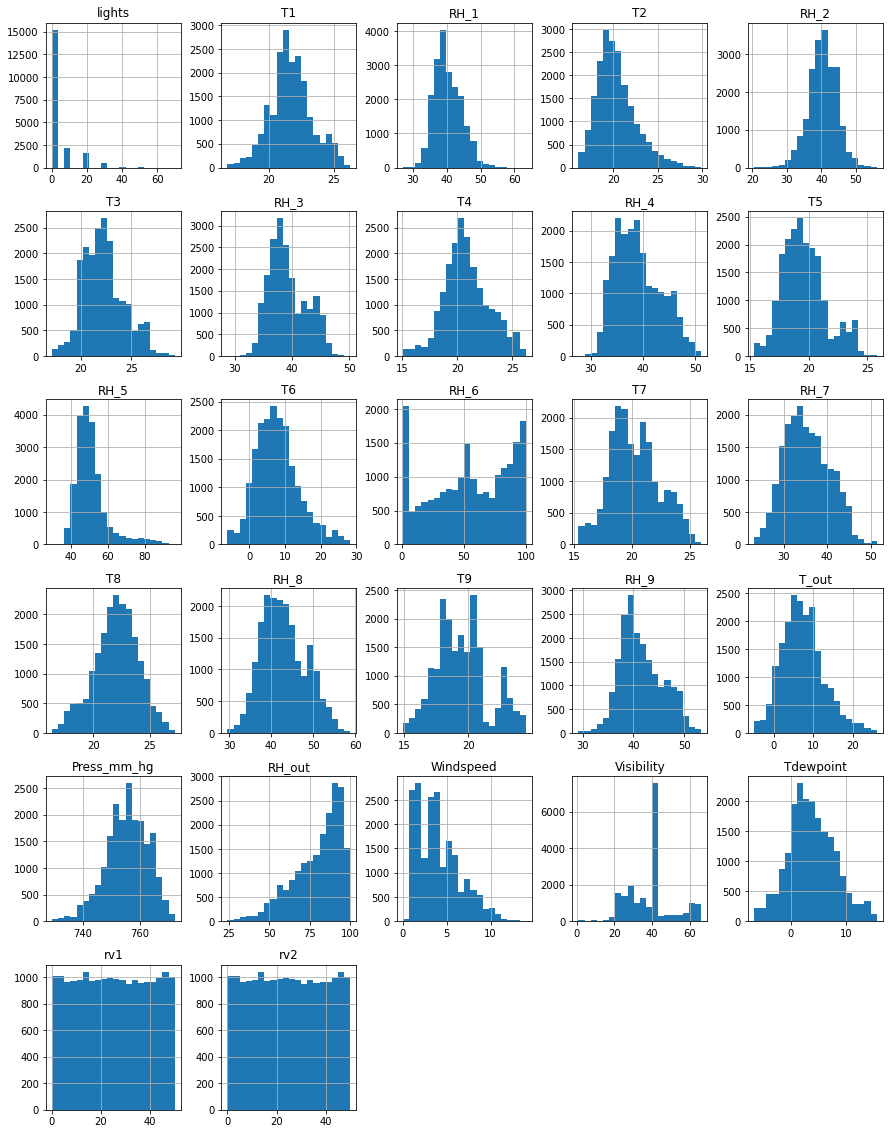

In [91]:
df.drop('Appliances',axis=1).hist(bins=20,figsize=(15,20));
plt.show()

In [92]:
correlation=df.corr()
corre = correlation.corr()

In [93]:
coeff = corre['Appliances'].sort_values(ascending=False)

In [94]:
coeff[coeff>0]

Appliances     1.000000
lights         0.251560
T6             0.151624
T2             0.150901
T_out          0.132951
T8             0.102464
T4             0.101417
T7             0.099082
T1             0.090725
Windspeed      0.082869
T3             0.081763
T9             0.071745
T5             0.053982
Press_mm_hg    0.009931
Name: Appliances, dtype: float64

In [95]:
coeff[coeff<0]

Visibility   -0.086891
Tdewpoint    -0.093586
rv1          -0.104907
rv2          -0.104907
RH_5         -0.179765
RH_1         -0.180548
RH_3         -0.211642
RH_6         -0.213168
RH_4         -0.226237
RH_7         -0.288073
RH_9         -0.291351
RH_8         -0.318502
RH_2         -0.324624
RH_out       -0.337962
Name: Appliances, dtype: float64

In [96]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.linear_model import Lasso,Ridge

In [97]:
df_undated = df.drop('date',axis=1)

In [98]:
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df_undated),columns=df_undated.columns)

# Q12. 
From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

In [99]:
x = np.array(normalised_df['T2'])
y = normalised_df['T6']

In [100]:
x.shape

(19735,)

In [101]:
y.shape

(19735,)

In [102]:
x=x.reshape(-1,1)

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=1)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)

In [104]:
r2score = r2_score(y_test, predicted_values)
ans= round(r2score, 2)
print("The R^2 value upto 2 decimal place is : {}".format(ans))

The R^2 value upto 2 decimal place is : 0.65


### ANSWER FOR QUESTION 12: 
The R^2 value upto 2 decimal place is : 0.65

#Q13.

Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

What is the Mean Absolute Error (in two decimal places)?

In [105]:
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df.drop(columns = "date")), columns=df.drop(columns = "date").columns)

In [106]:
features_df = normalised_df.drop(columns=['lights', "Appliances"])
target = normalised_df['Appliances']

In [107]:
x_train, x_test, y_train, y_test = train_test_split(features_df, target,test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

In [108]:
mae = mean_absolute_error(y_test, predicted)
ans=round(mae, 2)
print("The Mean Absolute Error upto 2 decimal place is : {}".format(ans))

The Mean Absolute Error upto 2 decimal place is : 0.05


### ANSWER FOR QUESTION 13: 
The Mean Absolute Error upto 2 decimal place is : 0.05

# Q14.

What is the Residual Sum of Squares (in two decimal places)?

In [109]:
rss = np.sum(np.square(y_test - predicted))
ans=round(rss, 2)
print("The Residual Sum of Squares upto 2 decimal place is : {}".format(ans))

The Residual Sum of Squares upto 2 decimal place is : 45.35


### ANSWER FOR QUESTION 14: 
The Residual Sum of Squares upto 2 decimal place is : 45.35

# Q15.

What is the Root Mean Squared Error (in three decimal places)?

In [110]:
rms = np.sqrt(mean_squared_error(y_test, predicted))
rms=round(rms,3)
print("The Root Mean Squared Error upto 3 decimal place is : {}".format(rms))

The Root Mean Squared Error upto 3 decimal place is : 0.088


### ANSWER FOR QUESTION 15: 

The Root Mean Squared Erro upto 3 decimal place is : 0.088

# Q16.

What is the Coefficient of Determination (in two decimal places)?

In [111]:
r2score = r2_score(y_test, predicted)
ans = round(r2score, 2)
print("The Coefficient of Determination upto 2 decimal place is : {}".format(ans))

The Coefficient of Determination upto 2 decimal place is : 0.15


### ANSWER FOR QUESTION 16: 

The Coefficient of Determination upto 2 decimal place is : 0.15

# Q17.

Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [112]:
datas = model.coef_
coll = x_train.columns
weights = pd.Series(datas,coll).sort_values()

In [113]:
weights_df = pd.DataFrame(weights).reset_index()
weights_df.columns=['Features','Linear Model Weight']

In [114]:
weights_df

,Features,Linear Model Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


In [115]:
print("The feature with the highest linear model weight is : {}".format(weights_df['Features'][0]))

The feature with the highest linear model weight is : RH_2


In [116]:
print("The feature with the highest linear model weight is : {}".format(weights_df['Features'][len(weights_df)-1]))

The feature with the highest linear model weight is : RH_1


### ANSWER FOR QUESTION 17: 

* The feature with the highest linear model weight is : RH_2
* The feature with the highest linear model weight is : RH_1

# Q18.

Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [117]:
ridge= Lasso(alpha=0.04)
ridge.fit(x_train, y_train)

Lasso(alpha=0.04)

In [118]:
pred_ridge = ridge.predict(x_test)
rms1 = np.sqrt(mean_squared_error(y_test, pred_ridge))
rms1 = round(rms1, 3)
print("The new Root Mean Squared Error is {} while the old one was : {}".format(rms1,rms))
print("So YES there is a change in Root Mean Squared Error")

The new Root Mean Squared Error is 0.095 while the old one was : 0.088
So YES there is a change in Root Mean Squared Error


### ANSWER FOR QUESTION 18: 

* The new Root Mean Squared Error is 0.095 while the old one was : 0.088
* So YES there is a change in Root Mean Squared Error

# Q19.

Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [119]:
lasso= Lasso(alpha=0.001)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)

In [120]:
datas = lasso.coef_
coll = x_train.columns
weights = pd.Series(datas,coll).sort_values()

In [121]:
weights_df = pd.DataFrame(weights).reset_index()
weights_df.columns=['Features','Lasso Weight']

In [122]:
lasso_weights=weights_df[weights_df['Lasso Weight']!=0]
lasso_weights

,Features,Lasso Weight
0,RH_out,-0.049557
1,RH_8,-0.000110
24,Windspeed,0.002912
25,RH_1,0.017880


In [123]:
print("There are {} number of non-zero feature weights".format(len(lasso_weights)))

There are 4 number of non-zero feature weights


### ANSWER FOR QUESTION 19: 

There are 4 number if non-zero feature weights

# Q20.

What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)



In [124]:
rms2 = np.sqrt(mean_squared_error(y_test, pred))
rms2 = round(rms2, 3)
print("The Root Mean Squared Error upto 3 decimal place is : {}".format(rms2))

The Root Mean Squared Error upto 3 decimal place is : 0.094


### ANSWER FOR QUESTION 20: 

The Root Mean Squared Error upto 3 decimal place is : 0.094